In [1]:
import shap
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
data = pd.read_csv('results/fnkz2KtgvwHsFoR9YmiBML.csv')

In [3]:
def model_predict(input_array, reference_data):
    input_df = pd.DataFrame(input_array, columns=categories)
    
    # Round and cast to int to match reference_data types
    for col in categories:
        input_df[col] = input_df[col].round().astype(int)

    merged = input_df.merge(reference_data[categories + ['score']], on=categories, how='left')
    merged['score'] = merged['score'].fillna(reference_data['score'].mean())
    
    return merged['score'].to_numpy()

In [26]:
categories = ["traffic", "street", "building", "vegetation", "person", "sky"]
results = []

for img_id in data['image_id'].unique():

    img_data = data[data.image_id == img_id]
    unmasked_response = img_data[img_data.label=='unmasked'].response.iloc[0]

    # run shap_analysis on binary values
    bin_X = img_data[categories].to_numpy()
    bin_model = lambda x: model_predict(x, img_data)
    bin_explainer = shap.KernelExplainer(bin_model, bin_X)
    bin_shap_values = bin_explainer.shap_values(bin_X)

    # run shap_analysis on prop values
    prop_X = img_data[[c + '_p' for c in categories]].to_numpy()
    prop_model = lambda x: model_predict(x, img_data)
    prop_explainer = shap.KernelExplainer(prop_model, prop_X)
    prop_shap_values = prop_explainer.shap_values(prop_X)

    image_results = {'image_id':img_id,
                     'bin_input':bin_X,
                     'prop_input':prop_X,
                     'unmasked_response':unmasked_response,
                     'binary_shap_values':bin_shap_values,
                     'proportion_shap_values':prop_shap_values}

    results.append(image_results)


  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

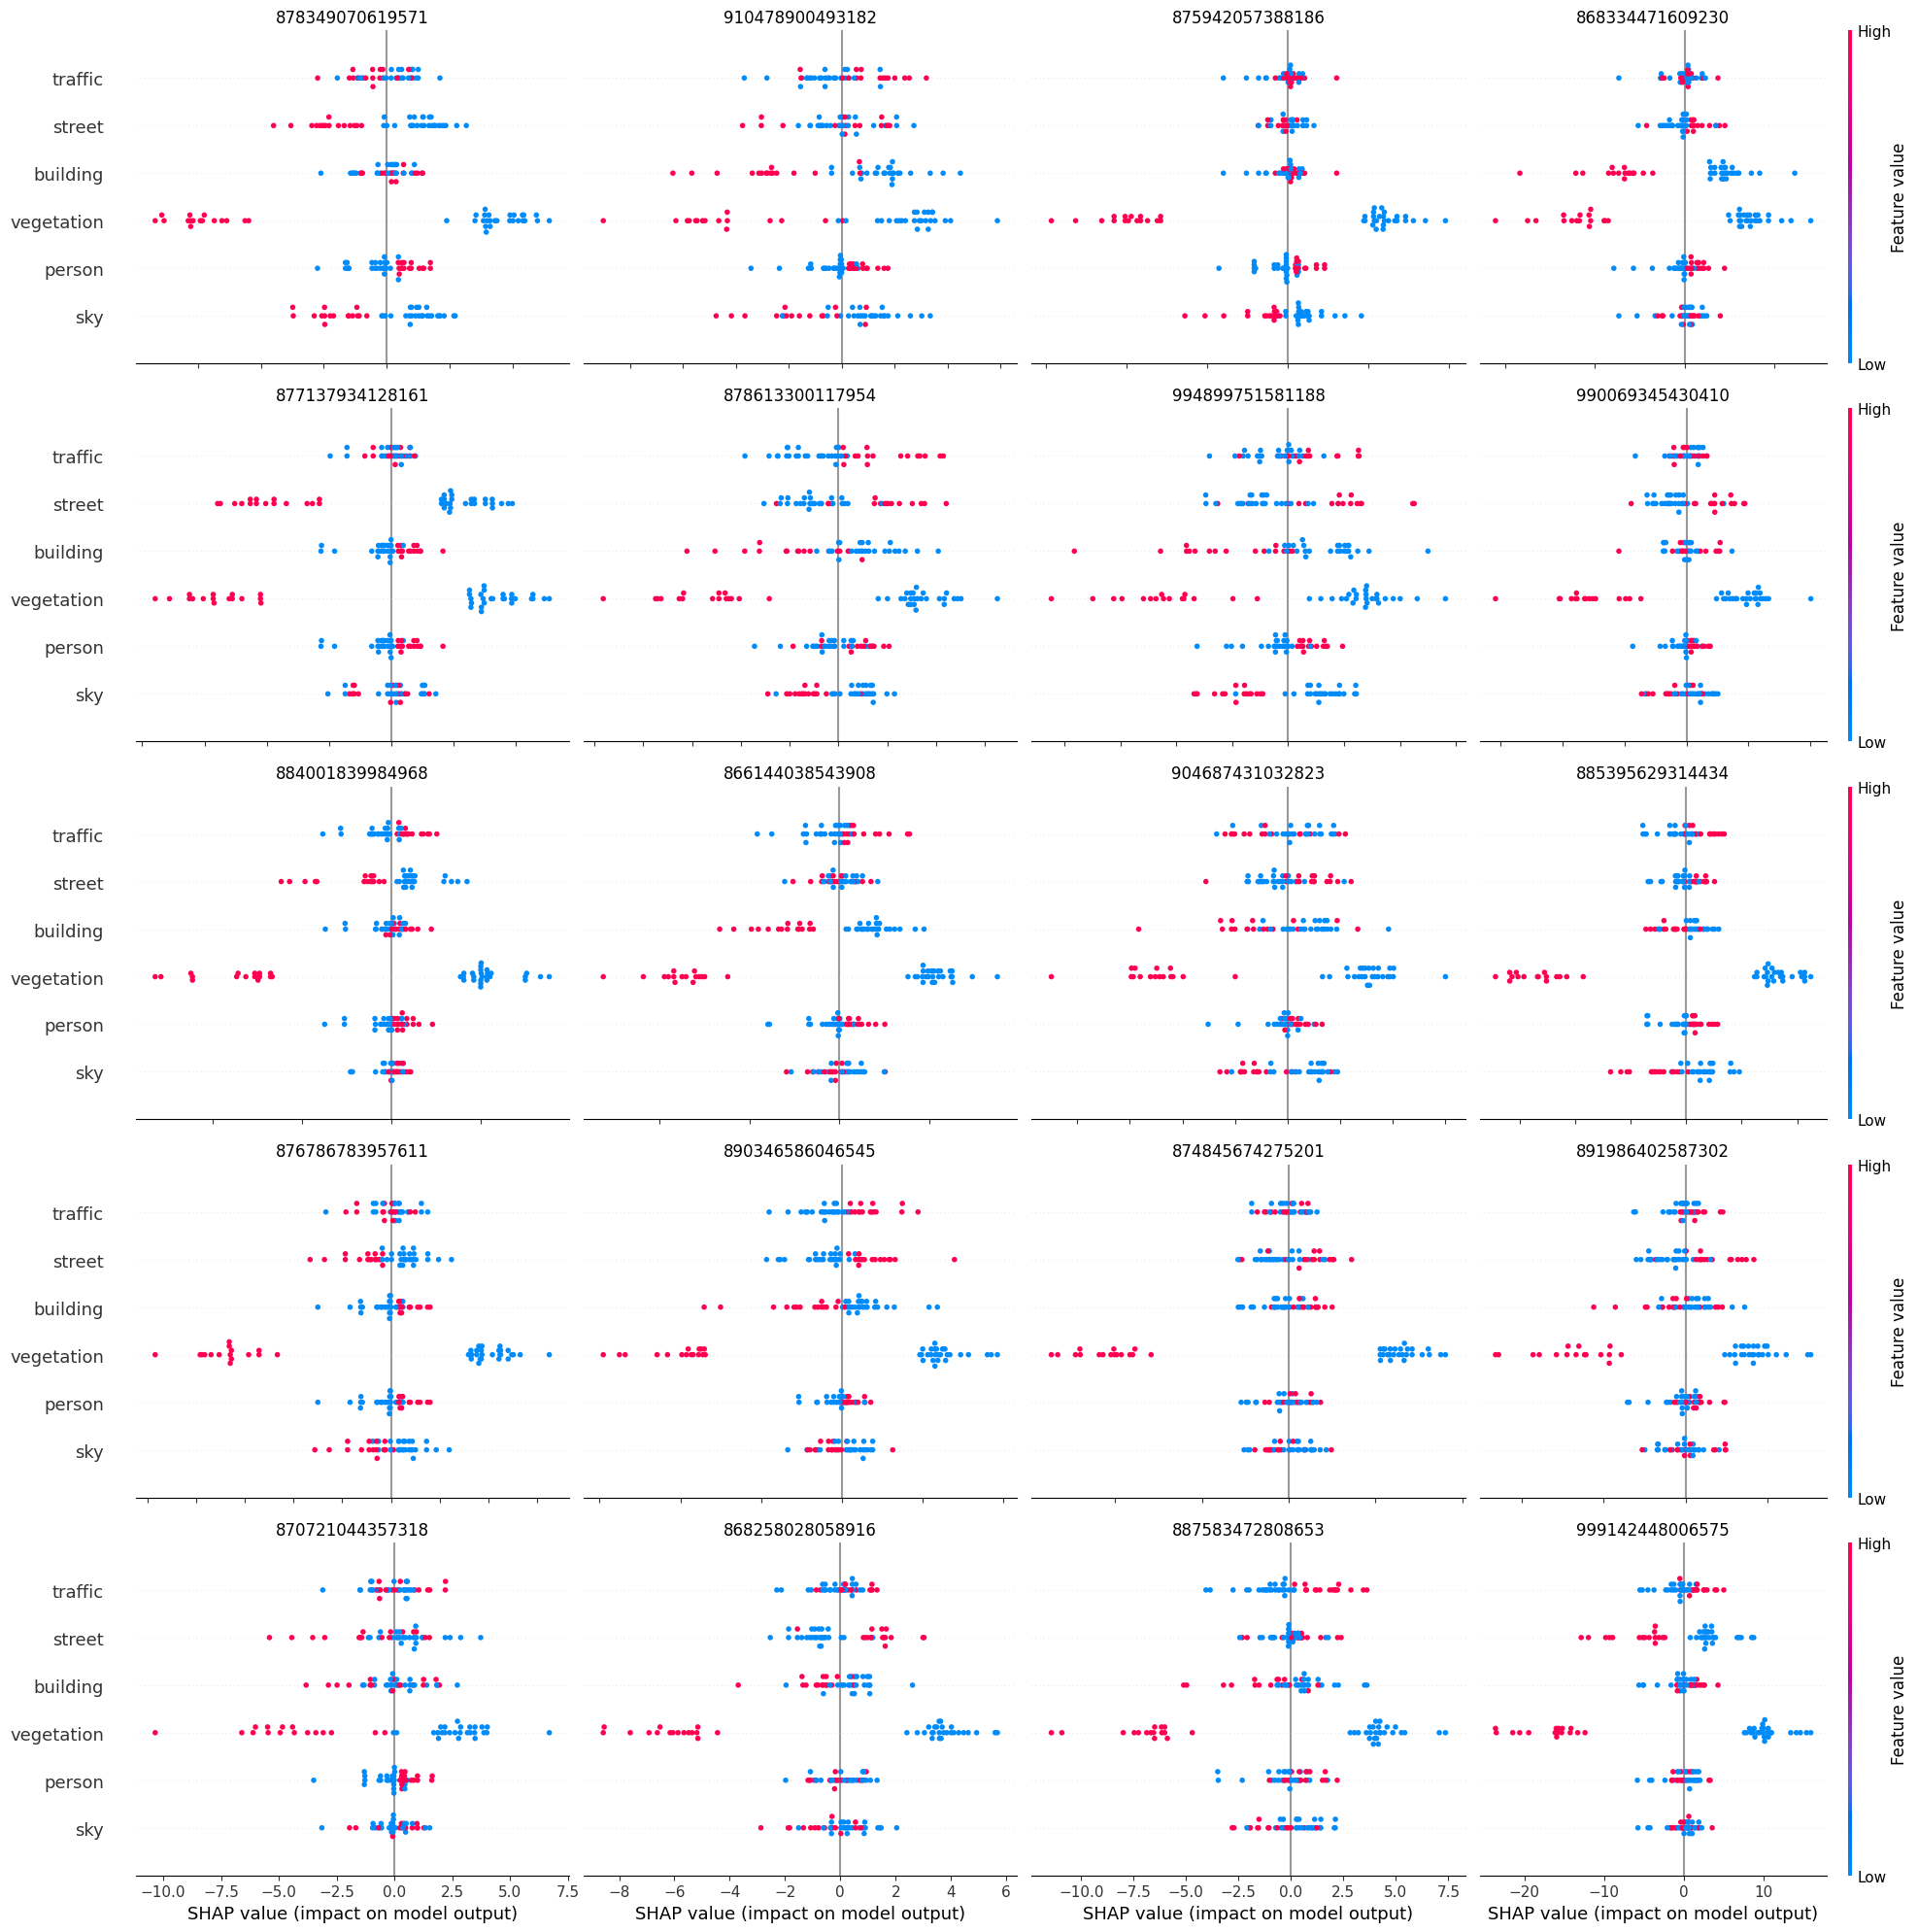

In [27]:
import matplotlib.pyplot as plt

n_rows, n_cols = 5, 4
fig, ax = plt.subplots(n_rows, n_cols, figsize=(20, 20))

for i, res in enumerate(results[:n_rows * n_cols]):
    row, col = divmod(i, n_cols)
    axs = ax[row][col]

    plt.sca(axs)
    shap.summary_plot(
        res['binary_shap_values'],
        res['bin_input'],
        feature_names=categories,
        sort=False,
        show=False,
        plot_size=None,
        color_bar=(col == n_cols - 1)  # Only show color bar on rightmost column
    )

    # Hide x-axis labels except bottom row
    if row < n_rows - 1:
        axs.set_xticklabels([])
        axs.set_xlabel(None)

    # Hide y-axis labels except leftmost column
    if col > 0:
        axs.set_yticklabels([])
        axs.set_ylabel(None)

    axs.set_title(res['image_id'])

plt.tight_layout()
plt.show()

The scene depicts a quiet, residential street with a mix of architectural styles. The presence of greenery and clear skies adds to its charm, while the parked cars and streetlights suggest a safe and walkable neighborhood. However, the lack of vibrant greenery and pedestrian activity slightly limits its overall appeal.

[
  {"estimated_score": 70}
]


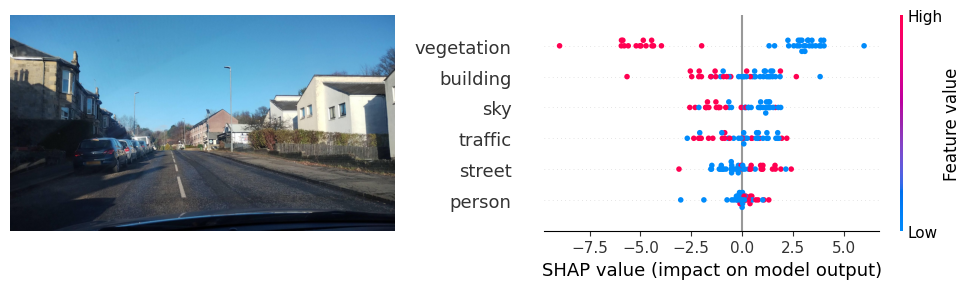

In [58]:
from PIL import Image
i = 10
fig, ax = plt.subplots(1,2, figsize=(10,3))

im = Image.open(f'images/glasgow/fnkz2KtgvwHsFoR9YmiBML/{results[i]["image_id"]}.jpg')

ax[0].imshow(im)
ax[0].set_axis_off()
plt.sca(ax[1])
shap.summary_plot(
    results[i]['binary_shap_values'],
    results[i]['bin_input'],
    feature_names=categories,
    show=False,
    plot_size=None, 
)

fig.tight_layout()
print(results[i]['unmasked_response'])